In [171]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 700)

In [172]:
# import subset master dataset data
data_df = pd.read_pickle('./../data/gelderman/gelderman_master_dataset_w_weather.pkl')
print(data_df.shape)
display(data_df.head())
display(data_df.info())

(174, 37)


,new_id,old_id,img_path,img_head,correct_img_date,date_placed_ARF,PMI_days,sex,age_at_death,est_stature_inches,est_weight,true_SOD_G_head,donor_date,img_torso,true_SOD_G_torso,img_limbs,true_SOD_G_limbs,temp_1_3_mean,temp_1_3_std,hum_1_3_mean,hum_1_3_std,temp_4_7_mean,temp_4_7_std,hum_4_7_mean,hum_4_7_std,temp_8_21_mean,temp_8_21_std,hum_8_21_mean,hum_8_21_std,temp_22_56_mean,temp_22_56_std,hum_22_56_mean,hum_22_56_std,temp_57_154_mean,temp_57_154_std,hum_57_154_mean,hum_57_154_std
0,004,UT06-18D,/da1_data/icputrd/arf/mean.js/public/anau_img3/004/00400124.12.JPG,00400124.12.JPG,2018-01-24,2018-01-09,15.0,0.0,77.0,64.00,180.0,3.0,00400124,00400124.07.JPG,3.0,00400124.10.JPG,3.0,9.315,0.888,71.621,12.679,-3.108,7.418,62.885,6.736,-0.699,6.638,74.493,16.490,4.205,5.889,78.049,14.677,16.426,6.113,76.979,10.014
1,006,UT08-18D,/da1_data/icputrd/arf/mean.js/public/anau_img3/006/00600212.07.JPG,00600212.07.JPG,2018-02-12,2018-01-09,34.0,1.0,81.0,NaN,NaN,3.0,00600212,00600212.25.JPG,3.0,00600212.06.JPG,3.0,9.461,4.403,86.695,15.567,3.024,1.901,80.516,12.758,4.897,3.853,69.225,14.323,0.878,7.154,75.502,15.670,13.500,7.154,78.095,10.514
2,00b,UT16-16D,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00525.08.JPG,00b00525.08.JPG,2016-05-25,2016-03-07,79.0,1.0,38.0,185.42,516.0,5.0,00b00525,00b00525.04.JPG,5.0,00b00525.27.JPG,3.0,19.485,0.935,57.198,2.203,18.725,0.697,76.769,8.882,17.617,4.230,64.476,8.287,16.590,4.368,58.561,15.086,7.484,7.232,69.266,15.024
3,00b,UT16-16D,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00818.07.JPG,00b00818.07.JPG,2016-08-18,2016-03-07,164.0,1.0,38.0,185.42,516.0,6.0,00b00818,00b00818.05.JPG,6.0,00b00818.11.JPG,3.0,27.174,1.174,71.959,6.483,28.471,0.317,63.152,0.949,26.955,1.031,72.737,6.045,26.864,1.680,67.719,7.432,18.606,5.250,63.088,13.413
4,00d,UT103-18D,/da1_data/icputrd/arf/mean.js/public/anau_img3/00d/00d10116.07.JPG,00d10116.07.JPG,2019-01-16,2018-11-27,50.0,1.0,73.0,185.42,235.0,5.0,00d10116,00d10116.04.JPG,4.0,00d10116.06.JPG,4.0,3.511,1.705,89.241,11.812,2.666,2.899,57.956,9.740,10.313,2.750,84.482,10.465,5.370,3.923,79.734,12.914,18.516,7.254,81.323,8.885


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   new_id              174 non-null    object        
 1   old_id              174 non-null    object        
 2   img_path            174 non-null    object        
 3   img_head            174 non-null    object        
 4   correct_img_date    174 non-null    datetime64[ns]
 5   date_placed_ARF     174 non-null    datetime64[ns]
 6   PMI_days            174 non-null    float64       
 7   sex                 174 non-null    float64       
 8   age_at_death        174 non-null    float64       
 9   est_stature_inches  168 non-null    float64       
 10  est_weight          162 non-null    float64       
 11  true_SOD_G_head     174 non-null    float64       
 12  donor_date          174 non-null    object        
 13  img_torso           174 non-null    object        

None

## Data processing

In [173]:
# drop columns
data_df.drop(['new_id', 'old_id', 'img_path', 'img_head', 'correct_img_date', 'date_placed_ARF',
             'donor_date', 'img_torso', 'img_limbs', ], axis=1, inplace=True)
data_df.head()

,PMI_days,sex,age_at_death,est_stature_inches,est_weight,true_SOD_G_head,true_SOD_G_torso,true_SOD_G_limbs,temp_1_3_mean,temp_1_3_std,hum_1_3_mean,hum_1_3_std,temp_4_7_mean,temp_4_7_std,hum_4_7_mean,hum_4_7_std,temp_8_21_mean,temp_8_21_std,hum_8_21_mean,hum_8_21_std,temp_22_56_mean,temp_22_56_std,hum_22_56_mean,hum_22_56_std,temp_57_154_mean,temp_57_154_std,hum_57_154_mean,hum_57_154_std
0,15.0,0.0,77.0,64.00,180.0,3.0,3.0,3.0,9.315,0.888,71.621,12.679,-3.108,7.418,62.885,6.736,-0.699,6.638,74.493,16.490,4.205,5.889,78.049,14.677,16.426,6.113,76.979,10.014
1,34.0,1.0,81.0,NaN,NaN,3.0,3.0,3.0,9.461,4.403,86.695,15.567,3.024,1.901,80.516,12.758,4.897,3.853,69.225,14.323,0.878,7.154,75.502,15.670,13.500,7.154,78.095,10.514
2,79.0,1.0,38.0,185.42,516.0,5.0,5.0,3.0,19.485,0.935,57.198,2.203,18.725,0.697,76.769,8.882,17.617,4.230,64.476,8.287,16.590,4.368,58.561,15.086,7.484,7.232,69.266,15.024
3,164.0,1.0,38.0,185.42,516.0,6.0,6.0,3.0,27.174,1.174,71.959,6.483,28.471,0.317,63.152,0.949,26.955,1.031,72.737,6.045,26.864,1.680,67.719,7.432,18.606,5.250,63.088,13.413
4,50.0,1.0,73.0,185.42,235.0,5.0,4.0,4.0,3.511,1.705,89.241,11.812,2.666,2.899,57.956,9.740,10.313,2.750,84.482,10.465,5.370,3.923,79.734,12.914,18.516,7.254,81.323,8.885


In [174]:
data_df.describe()

,PMI_days,sex,age_at_death,est_stature_inches,est_weight,true_SOD_G_head,true_SOD_G_torso,true_SOD_G_limbs,temp_1_3_mean,temp_1_3_std,hum_1_3_mean,hum_1_3_std,temp_4_7_mean,temp_4_7_std,hum_4_7_mean,hum_4_7_std,temp_8_21_mean,temp_8_21_std,hum_8_21_mean,hum_8_21_std,temp_22_56_mean,temp_22_56_std,hum_22_56_mean,hum_22_56_std,temp_57_154_mean,temp_57_154_std,hum_57_154_mean,hum_57_154_std
count,174.000000,174.000000,174.000000,168.000000,162.000000,174.000000,174.000000,174.00000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,50.597701,0.500000,65.724138,150.227869,190.179012,3.718391,3.442529,3.41954,15.989328,1.988517,69.007879,7.636477,15.953603,2.376862,69.382425,8.443753,15.336121,3.334851,70.223776,11.388218,14.787897,4.019977,70.355397,11.893672,13.923184,5.347282,70.505236,12.530236
std,58.937011,0.501443,14.469973,46.758081,66.456534,1.270386,1.145298,1.07621,8.120395,1.347015,11.305878,5.259685,7.997231,1.607689,10.074933,5.459827,7.947208,1.558467,7.686628,4.115326,8.098274,1.570345,5.986303,3.260473,6.739260,1.540595,4.793916,2.466553
min,0.000000,0.000000,30.000000,0.000000,95.000000,1.000000,1.000000,1.00000,-7.121000,0.124000,38.323000,0.297000,-5.316000,0.208000,47.953000,0.664000,-0.699000,0.927000,51.262000,2.979000,0.534000,1.259000,56.687000,5.379000,3.417000,1.978000,60.149000,7.156000
25%,14.000000,0.000000,57.250000,157.480000,145.000000,3.000000,3.000000,3.00000,10.225500,0.955500,61.780000,3.522500,10.073500,1.108500,61.654000,4.211250,8.028750,2.080000,64.945500,8.150750,7.091500,2.744500,66.475750,9.134750,8.067250,4.612500,67.211500,10.845250
50%,33.000000,0.500000,67.000000,167.322500,180.000000,3.000000,3.000000,3.00000,16.428500,1.660500,69.874000,6.553000,17.823500,1.932000,69.815000,7.352000,15.803500,3.124000,71.129000,11.108000,14.885500,4.060000,71.186500,11.709000,13.296500,5.620500,70.834000,12.202500
75%,65.500000,1.000000,76.000000,177.800000,220.000000,5.000000,4.000000,4.00000,23.052750,2.743250,77.654000,10.374750,23.015250,3.111500,77.588250,12.125750,22.740750,4.464000,76.222750,14.805000,22.909000,5.069000,74.509250,14.665750,19.999250,6.503250,73.905750,14.467000
max,450.000000,1.000000,96.000000,195.580000,516.000000,6.000000,6.000000,6.00000,29.529000,6.835000,93.632000,23.885000,28.654000,7.477000,89.175000,28.526000,27.411000,9.247000,87.105000,20.148000,27.460000,7.947000,82.669000,20.187000,26.142000,8.775000,81.323000,17.868000


In [175]:
# drop rows with missing values
data_df.dropna(inplace=True)
data_df.shape

(161, 28)

In [176]:
# drop rows with est_stature_inches == 0
data_df = data_df[data_df.est_stature_inches != 0].copy()
data_df.describe()

,PMI_days,sex,age_at_death,est_stature_inches,est_weight,true_SOD_G_head,true_SOD_G_torso,true_SOD_G_limbs,temp_1_3_mean,temp_1_3_std,hum_1_3_mean,hum_1_3_std,temp_4_7_mean,temp_4_7_std,hum_4_7_mean,hum_4_7_std,temp_8_21_mean,temp_8_21_std,hum_8_21_mean,hum_8_21_std,temp_22_56_mean,temp_22_56_std,hum_22_56_mean,hum_22_56_std,temp_57_154_mean,temp_57_154_std,hum_57_154_mean,hum_57_154_std
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,50.569620,0.512658,65.405063,154.511278,188.987342,3.753165,3.449367,3.468354,16.202734,1.984038,69.160430,7.627127,16.081013,2.370013,69.135297,8.471095,15.658032,3.310987,70.126778,11.206373,15.099443,3.972070,70.423892,11.828816,13.990829,5.353684,70.262025,12.563354
std,61.180673,0.501429,14.900108,39.746256,66.161065,1.260304,1.165029,1.080640,8.205104,1.359796,11.087461,5.357308,8.132379,1.645994,9.778734,5.616657,7.956314,1.575058,7.715552,4.094266,8.049464,1.554512,5.713583,3.228724,6.738345,1.546722,4.803719,2.507722
min,0.000000,0.000000,30.000000,61.000000,95.000000,1.000000,1.000000,1.000000,-7.121000,0.124000,38.323000,0.297000,-5.316000,0.208000,47.953000,0.748000,-0.699000,0.927000,51.262000,2.979000,0.534000,1.259000,57.350000,5.966000,3.417000,1.978000,60.149000,7.156000
25%,14.000000,0.000000,56.250000,160.020000,145.000000,3.000000,3.000000,3.000000,10.670750,0.939500,61.837500,3.367500,10.136000,1.065000,61.654000,4.175000,8.137750,2.047750,64.760000,8.095000,7.759250,2.738000,66.667500,9.091500,8.104750,4.612500,66.493500,10.845250
50%,28.000000,1.000000,66.000000,167.640000,180.000000,3.000000,3.000000,3.000000,17.197000,1.660500,69.874000,6.564000,18.047000,1.918500,69.468500,7.175000,16.697500,3.067000,71.218500,10.852000,15.315000,4.007500,71.121500,11.663000,13.395000,5.633000,70.621500,12.397500
75%,65.500000,1.000000,76.000000,177.800000,220.000000,5.000000,4.000000,4.000000,23.340000,2.729750,77.654000,10.145250,23.201250,3.111500,77.054500,12.206500,22.879750,4.464000,76.222750,14.632500,22.983500,4.980500,74.317000,14.266000,20.759000,6.503250,73.496500,14.623250
max,450.000000,1.000000,96.000000,195.580000,516.000000,6.000000,6.000000,6.000000,29.529000,6.835000,93.632000,23.885000,28.654000,7.477000,87.545000,28.526000,27.411000,9.247000,87.105000,20.148000,27.460000,7.947000,82.669000,20.187000,26.142000,8.775000,81.323000,17.868000


In [177]:
# convert to metric system
data_df['est_stature_cm'] = 2.54*data_df['est_stature_inches']
data_df['est_weight_kg'] = 0.45359237*data_df['est_weight']
data_df[['est_stature_cm', 'est_stature_inches', 'est_weight_kg', 'est_weight']].describe()

data_df.drop(['est_stature_inches', 'est_weight'], axis=1, inplace=True)

In [178]:
data_df.describe()

,PMI_days,sex,age_at_death,true_SOD_G_head,true_SOD_G_torso,true_SOD_G_limbs,temp_1_3_mean,temp_1_3_std,hum_1_3_mean,hum_1_3_std,temp_4_7_mean,temp_4_7_std,hum_4_7_mean,hum_4_7_std,temp_8_21_mean,temp_8_21_std,hum_8_21_mean,hum_8_21_std,temp_22_56_mean,temp_22_56_std,hum_22_56_mean,hum_22_56_std,temp_57_154_mean,temp_57_154_std,hum_57_154_mean,hum_57_154_std,est_stature_cm,est_weight_kg
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,50.569620,0.512658,65.405063,3.753165,3.449367,3.468354,16.202734,1.984038,69.160430,7.627127,16.081013,2.370013,69.135297,8.471095,15.658032,3.310987,70.126778,11.206373,15.099443,3.972070,70.423892,11.828816,13.990829,5.353684,70.262025,12.563354,392.458647,85.723216
std,61.180673,0.501429,14.900108,1.260304,1.165029,1.080640,8.205104,1.359796,11.087461,5.357308,8.132379,1.645994,9.778734,5.616657,7.956314,1.575058,7.715552,4.094266,8.049464,1.554512,5.713583,3.228724,6.738345,1.546722,4.803719,2.507722,100.955490,30.010154
min,0.000000,0.000000,30.000000,1.000000,1.000000,1.000000,-7.121000,0.124000,38.323000,0.297000,-5.316000,0.208000,47.953000,0.748000,-0.699000,0.927000,51.262000,2.979000,0.534000,1.259000,57.350000,5.966000,3.417000,1.978000,60.149000,7.156000,154.940000,43.091275
25%,14.000000,0.000000,56.250000,3.000000,3.000000,3.000000,10.670750,0.939500,61.837500,3.367500,10.136000,1.065000,61.654000,4.175000,8.137750,2.047750,64.760000,8.095000,7.759250,2.738000,66.667500,9.091500,8.104750,4.612500,66.493500,10.845250,406.450800,65.770894
50%,28.000000,1.000000,66.000000,3.000000,3.000000,3.000000,17.197000,1.660500,69.874000,6.564000,18.047000,1.918500,69.468500,7.175000,16.697500,3.067000,71.218500,10.852000,15.315000,4.007500,71.121500,11.663000,13.395000,5.633000,70.621500,12.397500,425.805600,81.646627
75%,65.500000,1.000000,76.000000,5.000000,4.000000,4.000000,23.340000,2.729750,77.654000,10.145250,23.201250,3.111500,77.054500,12.206500,22.879750,4.464000,76.222750,14.632500,22.983500,4.980500,74.317000,14.266000,20.759000,6.503250,73.496500,14.623250,451.612000,99.790321
max,450.000000,1.000000,96.000000,6.000000,6.000000,6.000000,29.529000,6.835000,93.632000,23.885000,28.654000,7.477000,87.545000,28.526000,27.411000,9.247000,87.105000,20.148000,27.460000,7.947000,82.669000,20.187000,26.142000,8.775000,81.323000,17.868000,496.773200,234.053663


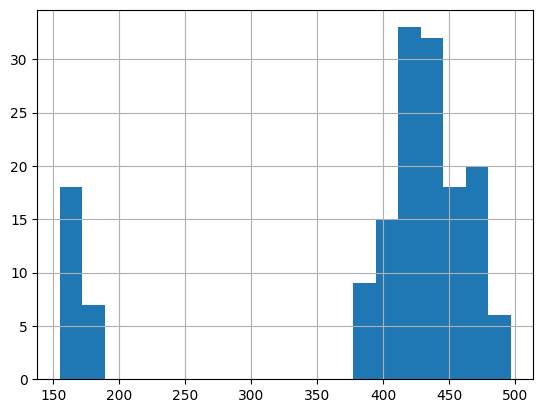

In [179]:
data_df['est_stature_cm'].hist(bins=20)
plt.show()

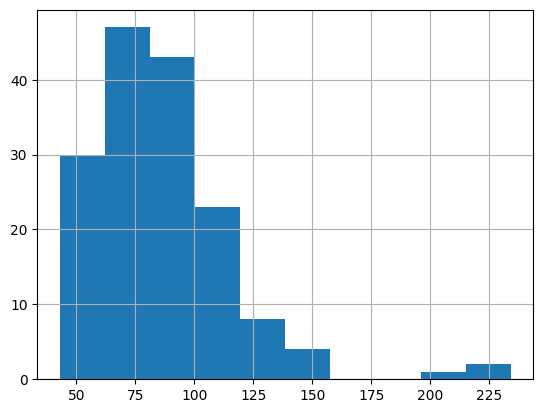

In [129]:
data_df['est_weight_kg'].hist()
plt.show()

Histograms show that the estimated stature and weight were possibly recorded in both the metric and imperial system and not just the imperial system (inches and lbs) which should be the case.

For now, lets drop them.

In [130]:
data_df.drop(['est_stature_cm', 'est_weight_kg'], axis=1, inplace=True)

In [180]:
data_df.head()

,PMI_days,sex,age_at_death,true_SOD_G_head,true_SOD_G_torso,true_SOD_G_limbs,temp_1_3_mean,temp_1_3_std,hum_1_3_mean,hum_1_3_std,temp_4_7_mean,temp_4_7_std,hum_4_7_mean,hum_4_7_std,temp_8_21_mean,temp_8_21_std,hum_8_21_mean,hum_8_21_std,temp_22_56_mean,temp_22_56_std,hum_22_56_mean,hum_22_56_std,temp_57_154_mean,temp_57_154_std,hum_57_154_mean,hum_57_154_std,est_stature_cm,est_weight_kg
0,15.0,0.0,77.0,3.0,3.0,3.0,9.315,0.888,71.621,12.679,-3.108,7.418,62.885,6.736,-0.699,6.638,74.493,16.490,4.205,5.889,78.049,14.677,16.426,6.113,76.979,10.014,162.5600,81.646627
2,79.0,1.0,38.0,5.0,5.0,3.0,19.485,0.935,57.198,2.203,18.725,0.697,76.769,8.882,17.617,4.230,64.476,8.287,16.590,4.368,58.561,15.086,7.484,7.232,69.266,15.024,470.9668,234.053663
3,164.0,1.0,38.0,6.0,6.0,3.0,27.174,1.174,71.959,6.483,28.471,0.317,63.152,0.949,26.955,1.031,72.737,6.045,26.864,1.680,67.719,7.432,18.606,5.250,63.088,13.413,470.9668,234.053663
4,50.0,1.0,73.0,5.0,4.0,4.0,3.511,1.705,89.241,11.812,2.666,2.899,57.956,9.740,10.313,2.750,84.482,10.465,5.370,3.923,79.734,12.914,18.516,7.254,81.323,8.885,470.9668,106.594207
5,11.0,0.0,90.0,2.0,2.0,2.0,3.825,1.623,80.427,17.534,3.942,4.081,64.240,4.184,6.799,5.078,79.896,12.073,10.311,4.085,80.913,11.039,24.042,2.560,80.822,7.902,445.1604,77.110703


In [181]:
# rename sex feature
data_df.rename(columns={"sex": "sex_male"}, inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 173
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PMI_days          158 non-null    float64
 1   sex_male          158 non-null    float64
 2   age_at_death      158 non-null    float64
 3   true_SOD_G_head   158 non-null    float64
 4   true_SOD_G_torso  158 non-null    float64
 5   true_SOD_G_limbs  158 non-null    float64
 6   temp_1_3_mean     158 non-null    float64
 7   temp_1_3_std      158 non-null    float64
 8   hum_1_3_mean      158 non-null    float64
 9   hum_1_3_std       158 non-null    float64
 10  temp_4_7_mean     158 non-null    float64
 11  temp_4_7_std      158 non-null    float64
 12  hum_4_7_mean      158 non-null    float64
 13  hum_4_7_std       158 non-null    float64
 14  temp_8_21_mean    158 non-null    float64
 15  temp_8_21_std     158 non-null    float64
 16  hum_8_21_mean     158 non-null    float64
 1

## Train-test split

In [182]:
X = data_df.iloc[:, 1:].copy()
display(X.head())
print(X.shape)
y = data_df.iloc[:, 0:1].copy()
display(y.head())
print(y.shape)

,sex_male,age_at_death,true_SOD_G_head,true_SOD_G_torso,true_SOD_G_limbs,temp_1_3_mean,temp_1_3_std,hum_1_3_mean,hum_1_3_std,temp_4_7_mean,temp_4_7_std,hum_4_7_mean,hum_4_7_std,temp_8_21_mean,temp_8_21_std,hum_8_21_mean,hum_8_21_std,temp_22_56_mean,temp_22_56_std,hum_22_56_mean,hum_22_56_std,temp_57_154_mean,temp_57_154_std,hum_57_154_mean,hum_57_154_std,est_stature_cm,est_weight_kg
0,0.0,77.0,3.0,3.0,3.0,9.315,0.888,71.621,12.679,-3.108,7.418,62.885,6.736,-0.699,6.638,74.493,16.490,4.205,5.889,78.049,14.677,16.426,6.113,76.979,10.014,162.5600,81.646627
2,1.0,38.0,5.0,5.0,3.0,19.485,0.935,57.198,2.203,18.725,0.697,76.769,8.882,17.617,4.230,64.476,8.287,16.590,4.368,58.561,15.086,7.484,7.232,69.266,15.024,470.9668,234.053663
3,1.0,38.0,6.0,6.0,3.0,27.174,1.174,71.959,6.483,28.471,0.317,63.152,0.949,26.955,1.031,72.737,6.045,26.864,1.680,67.719,7.432,18.606,5.250,63.088,13.413,470.9668,234.053663
4,1.0,73.0,5.0,4.0,4.0,3.511,1.705,89.241,11.812,2.666,2.899,57.956,9.740,10.313,2.750,84.482,10.465,5.370,3.923,79.734,12.914,18.516,7.254,81.323,8.885,470.9668,106.594207
5,0.0,90.0,2.0,2.0,2.0,3.825,1.623,80.427,17.534,3.942,4.081,64.240,4.184,6.799,5.078,79.896,12.073,10.311,4.085,80.913,11.039,24.042,2.560,80.822,7.902,445.1604,77.110703


(158, 27)


,PMI_days
0,15.0
2,79.0
3,164.0
4,50.0
5,11.0


(158, 1)


In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   random_state=0,  
                                   test_size=0.2,  
                                   shuffle=True)

In [184]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(126, 27) (126, 1) (32, 27) (32, 1)


In [185]:
X_train.columns

Index(['sex_male', 'age_at_death', 'true_SOD_G_head', 'true_SOD_G_torso',
       'true_SOD_G_limbs', 'temp_1_3_mean', 'temp_1_3_std', 'hum_1_3_mean',
       'hum_1_3_std', 'temp_4_7_mean', 'temp_4_7_std', 'hum_4_7_mean',
       'hum_4_7_std', 'temp_8_21_mean', 'temp_8_21_std', 'hum_8_21_mean',
       'hum_8_21_std', 'temp_22_56_mean', 'temp_22_56_std', 'hum_22_56_mean',
       'hum_22_56_std', 'temp_57_154_mean', 'temp_57_154_std',
       'hum_57_154_mean', 'hum_57_154_std', 'est_stature_cm', 'est_weight_kg'],
      dtype='object')

## Standardize data

In [190]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['age_at_death', 'temp_1_3_mean', 'temp_1_3_std', 'hum_1_3_mean',
       'hum_1_3_std', 'temp_4_7_mean', 'temp_4_7_std', 'hum_4_7_mean',
       'hum_4_7_std', 'temp_8_21_mean', 'temp_8_21_std', 'hum_8_21_mean',
       'hum_8_21_std', 'temp_22_56_mean', 'temp_22_56_std', 'hum_22_56_mean',
       'hum_22_56_std', 'temp_57_154_mean', 'temp_57_154_std',
       'hum_57_154_mean', 'hum_57_154_std']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [191]:
X_train_stand.describe()

,sex_male,age_at_death,true_SOD_G_head,true_SOD_G_torso,true_SOD_G_limbs,temp_1_3_mean,temp_1_3_std,hum_1_3_mean,hum_1_3_std,temp_4_7_mean,temp_4_7_std,hum_4_7_mean,hum_4_7_std,temp_8_21_mean,temp_8_21_std,hum_8_21_mean,hum_8_21_std,temp_22_56_mean,temp_22_56_std,hum_22_56_mean,hum_22_56_std,temp_57_154_mean,temp_57_154_std,hum_57_154_mean,hum_57_154_std,est_stature_cm,est_weight_kg
count,126.000000,1.260000e+02,126.000000,126.000000,126.000000,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,126.000000,126.000000
mean,0.515873,3.718366e-16,3.809524,3.484127,3.523810,-4.009139e-17,-2.189607e-16,-1.103174e-15,-1.409807e-17,-3.965082e-17,-1.938485e-16,7.886108e-16,-1.938485e-16,-2.290936e-17,-1.035327e-16,1.842442e-15,-4.361590e-17,-1.339317e-16,-8.282616e-17,3.013462e-15,4.291100e-16,2.484785e-16,-1.083789e-16,-3.104714e-15,-7.665826e-17,386.228449,86.592943
std,0.501743,1.003992e+00,1.243957,1.136550,1.048536,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,106.748244,31.029295
min,0.000000,-2.422550e+00,1.000000,1.000000,1.000000,-2.834492e+00,-1.280580e+00,-2.838031e+00,-1.318221e+00,-2.638340e+00,-1.320430e+00,-2.173227e+00,-1.376703e+00,-2.112502e+00,-1.453653e+00,-2.588094e+00,-1.939036e+00,-1.894244e+00,-1.664977e+00,-2.378266e+00,-1.729595e+00,-1.707304e+00,-2.118310e+00,-2.001002e+00,-2.084859e+00,154.940000,43.091275
25%,0.000000,-5.642334e-01,3.000000,3.000000,3.000000,-6.258125e-01,-7.417411e-01,-6.752886e-01,-8.260918e-01,-7.200605e-01,-7.727952e-01,-7.577685e-01,-7.751338e-01,-9.207573e-01,-8.300657e-01,-7.184114e-01,-7.691773e-01,-9.300117e-01,-8.496252e-01,-6.616157e-01,-8.606163e-01,-9.030970e-01,-7.192629e-01,-7.942465e-01,-8.608338e-01,399.999200,66.791476
50%,1.000000,-1.623693e-03,3.500000,3.000000,3.000000,2.405052e-01,-2.664402e-01,8.986400e-02,-2.076291e-01,2.479154e-01,-2.619041e-01,2.081683e-02,-2.083484e-01,2.283516e-01,-1.475026e-01,2.229753e-01,-7.000074e-02,1.199573e-01,2.338271e-02,1.260934e-01,-1.001353e-02,-4.733790e-02,2.333137e-01,6.872645e-02,-9.956472e-02,419.354000,81.646627
75%,1.000000,6.462299e-01,5.000000,4.000000,4.000000,8.179905e-01,5.470251e-01,7.040317e-01,4.854420e-01,8.292232e-01,3.827005e-01,8.502585e-01,6.616012e-01,8.785992e-01,6.742735e-01,7.809370e-01,8.410513e-01,9.408377e-01,7.088484e-01,6.421124e-01,7.522031e-01,1.084782e+00,7.472331e-01,7.118346e-01,8.553184e-01,451.612000,99.223331
max,1.000000,2.078327e+00,6.000000,6.000000,6.000000,1.549731e+00,3.457251e+00,2.201693e+00,3.163238e+00,1.487658e+00,3.286856e+00,1.940164e+00,2.867414e+00,1.407325e+00,3.711353e+00,1.860868e+00,2.335570e+00,1.456349e+00,2.256912e+00,2.149574e+00,2.589784e+00,1.708218e+00,2.080426e+00,2.192122e+00,2.163862e+00,496.773200,234.053663


## Build models

In [188]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [195]:
# First create the base model to tune
rf = RandomForestRegressor(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(estimator = rf, param_grid = params, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_stand, y_train)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]},
             verbose=2)

In [196]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [204]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    predictions=predictions.reshape(32,1)
    errors = abs(predictions - test_labels)
    print(errors)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error:', np.mean(errors))
    print('Accuracy:', accuracy)
    
    return accuracy

In [205]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_stand, y_test)

       PMI_days
9     85.346335
50    29.864178
127   28.405808
134   32.450897
69    18.413859
136    9.065091
135    0.631161
154    9.176350
119   43.812615
98   398.584547
28    14.796128
156  108.488957
30    46.225694
66    20.401563
86    21.201453
105   59.997899
143   15.982666
106   44.454208
157    3.566617
62    42.080253
51    38.208920
38    21.191664
65    14.761909
10    89.657829
46    26.012742
42    23.595900
110   16.293067
22     2.075516
159    0.529063
118   26.269409
57    29.584504
60    36.717847
Model Performance
Average Error: PMI_days    42.432645
dtype: float64
Accuracy: PMI_days   -166.937092
dtype: float64


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
params = {'n_estimators':[10,50,100,250], 'max_depth':[5,10,20]}

rf_clf = RandomForestClassifier(random_state=42)
gs = GridSearchCV(rf_clf, params, scoring='roc_auc', n_jobs=-1)
gs.fit(X_train_stand, y_train)

print("Best set of Parameters",gs.best_params_)
print("Best Score",gs.best_score_)

In [143]:
# Initialze the estimators
rf = RandomForestRegressor(random_state=42)
svc = SVC(kernel = 'rbf', random_state=42)
gb = GradientBoostingRegressor(random_state=42)

In [168]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier'] = [rf]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier'] = [svc]

param3 = {}
param3['classifier__n_estimators'] = [10, 50, 100, 250]
param3['classifier__max_depth'] = [5, 10, 20]
param3['classifier'] = [gb]

In [169]:
pipeline = Pipeline([('classifier', rf), ('classifier', svc), ('classifier', gb)])
params = [param1, param2, param3]

In [170]:
%%time
# Train the grid search model
gs = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, scoring='roc_auc').fit(X_train_stand, y_train)

ValueError: Invalid parameter 'C' for estimator GradientBoostingRegressor(random_state=42). Valid parameters are: ['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'].

In [159]:
# Best performing model and its corresponding hyperparameters
gs.best_params_

{'classifier': RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42),
 'classifier__max_depth': 5,
 'classifier__n_estimators': 10}